In [137]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

In [138]:
from keras.datasets import mnist, fashion_mnist, cifar10
#m = mnist.load_data()
c = cifar10.load_data()
#mnist.load_data()

## train test split

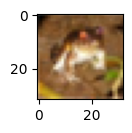

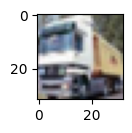

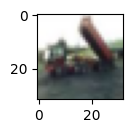

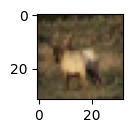

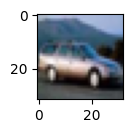

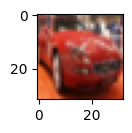

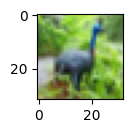

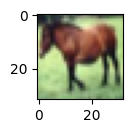

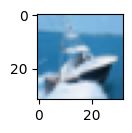

In [139]:
#(x_train,y_train),(x_test,y_test) = mnist.load_data()
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [140]:
x_train.shape
x_train.shape[0]
x_test.shape[0]
'''x_train = x_train.reshape((x_train.shape[0],28,28,3))
x_test = x_test.reshape((x_test.shape[0],28,28,3))'''

x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [141]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

train_norm = train_norm/255.0
test_norm = test_norm/255.0

In [142]:
#CNN Layers

from keras.models import Sequential
from keras.layers import Dense , Dropout, BatchNormalization

from keras.layers import Conv1D,Conv2D, Conv3D, MaxPooling2D, Flatten

####chatgpt##########
# model = Sequential()

# model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
# model.add(BatchNormalization())
# model.add(Conv2D(32,(3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3), activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(64,(3,3), activation='relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))
##############################
model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
layers.Dropout(0.3),
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax')) #10 beacause dataset has 10 classes to classify and softmax because it give probabilty of input bleonging to each class

In [143]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
m2 = model.fit(train_norm,y_train, epochs=10, batch_size=64,validation_data=(test_norm,y_test))

pred = model.predict(test_norm)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.5117 - loss: 1.3780 - val_accuracy: 0.5112 - val_loss: 1.4137
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.6537 - loss: 0.9896 - val_accuracy: 0.6323 - val_loss: 1.0426
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 35ms/step - accuracy: 0.7054 - loss: 0.8436 - val_accuracy: 0.5726 - val_loss: 1.3180
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.7419 - loss: 0.7426 - val_accuracy: 0.6853 - val_loss: 0.9212
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7666 - loss: 0.6702 - val_accuracy: 0.6316 - val_loss: 1.1570
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 27ms/step - accuracy: 0.7880 - loss: 0.6117 - val_accuracy: 0.6700 - val_loss: 1.0139
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8061 - loss: 0.5557 - val_accuracy: 0.6954 - val_loss: 0.9264
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.8189 - loss: 0.5143 - 

In [144]:
pred[0]
np.argmax(pred[0])

np.int64(3)

In [145]:
from sklearn.metrics import mean_squared_error, confusion_matrix

pred[0]
np.argmax(pred[0])
y_test[0]

#model.summary()
acc=m2.history['accuracy']
val_acc=m2.history['val_accuracy']

loss=m2.history['loss']
val_loss=m2.history['val_loss']

In [146]:
#testing using internet image of ship
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 1. Load and resize
# Note: target_size is usually (height, width)
img = load_img('./dog.jpg', target_size=(32, 32))

# 2. Convert to array
img = img_to_array(img)

# 3. Reshape to (batch_size, height, width, channels)
img = img.reshape(1, 32, 32, 3)

# 4. Preprocess (Scale to 0-1)
img = img.astype('float32')
img = img / 255.0


# Define the label names in the specific CIFAR-10 order
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Example of how to use it with your argmax prediction
prediction_index = model.predict(img).argmax()
prediction_label = class_names[prediction_index]

print(f"Predicted Class: {prediction_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Class: dog


In [147]:
print("Train acc:", m2.history['accuracy'][-1])
print("Val acc:", m2.history['val_accuracy'][-1])

Train acc: 0.845740020275116
Val acc: 0.7055000066757202


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_63          │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 251,172 (981.14 KB)

 Trainable params: 83,550 (326.37 KB)

 Non-trainable params: 520 (2.03 KB)

 Optimizer params: 167,102 (652.75 KB)

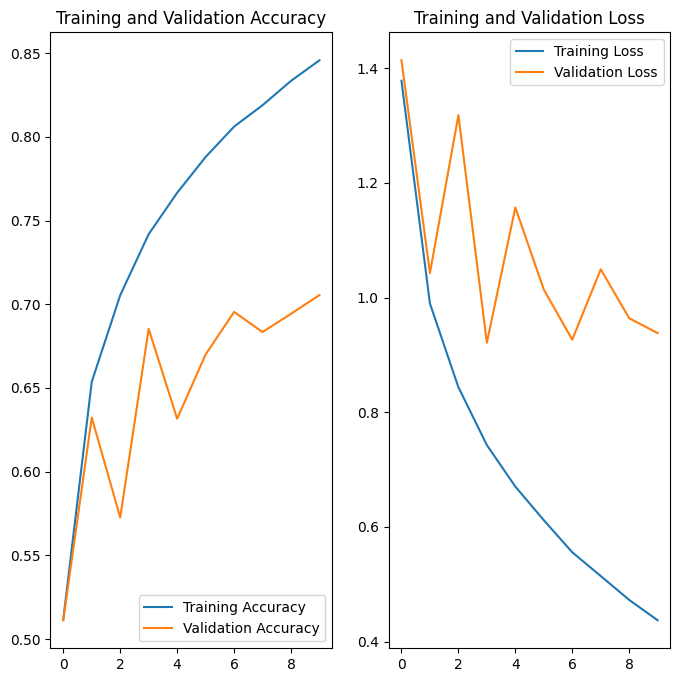

In [148]:
from sklearn.metrics import mean_squared_error, confusion_matrix

pred[0]
np.argmax(pred[0])
y_test[0]

model.summary()

acc=m2.history['accuracy']
val_acc=m2.history['val_accuracy']

loss=m2.history['loss']
val_loss=m2.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


# Mnist 

In [149]:
from keras.datasets import mnist

In [150]:
m = mnist.load_data()

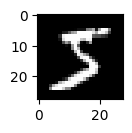

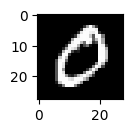

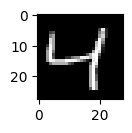

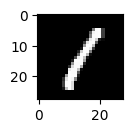

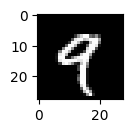

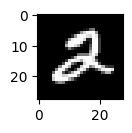

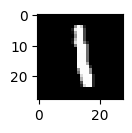

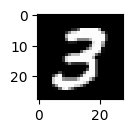

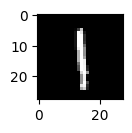

In [151]:
#splitting data
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to (Samples, 28, 28, 1) and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") 
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") 
for i in range(9):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [152]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

train_norm = x_train.astype('float32')
test_norm = x_test.astype('float32')

train_norm = train_norm/255.0
test_norm = test_norm/255.0

In [153]:
from keras.models import Sequential
from keras.layers import Dense , Dropout, BatchNormalization

from keras.layers import Conv1D,Conv2D, Conv3D, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
m2 = model.fit(train_norm,y_train, epochs=10, batch_size=25,validation_data=(test_norm,y_test))

pred = model.predict(test_norm)

Epoch 1/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 32s 12ms/step - accuracy: 0.9547 - loss: 0.1502 - val_accuracy: 0.9752 - val_loss: 0.0848
Epoch 2/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.9795 - loss: 0.0663 - val_accuracy: 0.9795 - val_loss: 0.0686
Epoch 3/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.9836 - loss: 0.0534 - val_accuracy: 0.9872 - val_loss: 0.0417
Epoch 4/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.9868 - loss: 0.0419 - val_accuracy: 0.9859 - val_loss: 0.0472
Epoch 5/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 6/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9909 - loss: 0.0290 - val_accuracy: 0.9880 - val_loss: 0.0412
Epoch 7/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accuracy: 0.9868 - val_loss: 0.0447
Epoch 8/10
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9926 -

In [156]:
model.input_shape

(None, 28, 28, 1)

In [154]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# 1. Load and resize (MNIST is 28x28 and grayscale!)
# Use color_mode='grayscale' to get 1 channel instead of 3
img = load_img('./3.png', target_size=(28, 28), color_mode='grayscale')

# 2. Convert to array
img = img_to_array(img)

# 3. Reshape to (1, 28, 28, 1)
# The '1' at the end is the channel axis your model is looking for
img = img.reshape(1, 28, 28, 1)

# 4. Preprocess (Scale to 0-1)
img = img.astype('float32') / 255.0

# 5. Define MNIST Labels (0-9)
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

# 6. Predict
prediction_index = model.predict(img).argmax()
prediction_label = class_names[prediction_index]

print(f"Predicted Digit: {prediction_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
Predicted Digit: Three
